<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Laboratorios_Taller/Lab10_AtractorLorentz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# [Atractor de lorentz](https://en.wikipedia.org/wiki/Lorenz_system)



Dada el siguiente sistema de ecuaciones, asociadas a un modelo simplificado de la atomosfera, encontrar los valores de x, y, z.

\begin{equation}
\frac{\mathrm{d}x}{\mathrm{d}t} = \sigma (y-x)
\end{equation}


\begin{equation}
\frac{\mathrm{d}y}{\mathrm{d}t} = x(\rho-z)-y
\end{equation}

\begin{equation}
\frac{\mathrm{d}z}{\mathrm{d}t} = xy-\beta z
\end{equation}

El modelo anteror permite describir de un a manera simplificada el movimiento atmosférico de masas de aire, los valores x, y, z se corresponden a posiciones de un volumen que contiene  una masa de aire, y los párametros $\sigma$, $\beta$ y  $\rho$ hacen referencia a, las siguientes cantidades fisicas:

\begin{equation}
\sigma = \frac{\mathrm{viscosidad}}{\mathrm{conductividad\ térmica }},
\end{equation}

$\rho$ hace refencia al término de convección entre el suelo y el techo del volumen discretizado.

\begin{equation}
\rho =\frac{g\beta}{v \alpha} (T_s-T_{\infty})L^3
\end{equation}

y $\beta=\frac{\mathrm{Ancho\ del\ cubo}}{\mathrm{Altura\ de\ la\ caja}}$ es un termino geométrico.


<!-- Tiene puntos de equilibrio en
- $(x, y, z)=(0,0,0)$
- $(\pm \sqrt{\beta(\rho-1}),\pm \sqrt{\beta(\rho-1}),\rho-1)$

El sistema de ecuaciones anterior puede ser escrito como:
\begin{equation}
\begin{pmatrix}
-\sigma & \sigma & 0\\
\rho-z & -1 & 0\\
y & 0 & -\beta
\end{pmatrix}
\end{equation} -->



Emplee la integración [odeint](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html) para realizar la integración del sistema de ecuaciones diferenciales

1. Importe las librerias odeint, numpy, matplotlib


In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

2. Defina una función con el sistema de ecuaciones a integrar, para ello construya el siguiente el sistema de ecuaciones en una función:


Puede ser escrito como:

\begin{equation}
\begin{bmatrix}
\frac{\mathrm{d}U_1}{\mathrm{d}t}\\
\frac{\mathrm{d}U_2}{\mathrm{d}t}\\
\frac{\mathrm{d}U_3}{\mathrm{d}t}
\end{bmatrix}=
\begin{bmatrix}
\sigma (U_1-U_0)\\
U_0(\rho-U_2)\\
xy-\beta z\\
\end{bmatrix}
\end{equation}


In [ ]:
def fun_atractor(r, t, sigma,beta,rho):
  x = r[0]
  y = r[1]
  z = r[2]
  dxdt = sigma*(r[1]-r[0])
  dydt = (r[0]*(rho - r[2])) - r[1]
  dzdt = (r[0]*r[1]) - beta*r[2]
  return [dxdt,dydt,dzdt]


def graficar_atractor(fun, r, t, params):
  sol = odeint(fun, r, t, args=params)
  x =sol[:, 0]
  y =sol[:, 1]
  z =sol[:, 2]
  fig = plt.figure()
  ax = fig.add_subplot(projection="3d")
  ax.plot(x,y,z)
  plt.draw()
  plt.show()



3. Solucione el sistema de ecuaciones para los siguientes parámetros y  realice un gráfico en 3D de la solución, empleando el código de más abajo.

```
fig = plt.figure()
ax = fig.gca(projection="3d")
ax.plot(x,y,z)
plt.draw()
plt.show()
```

- $\sigma = 10.0$, $\beta = 8./3$ ,$\rho = 28$  con condiciones iniciales,  $x_0,y_0,z_0 = [1.5,1.5,1.5]$



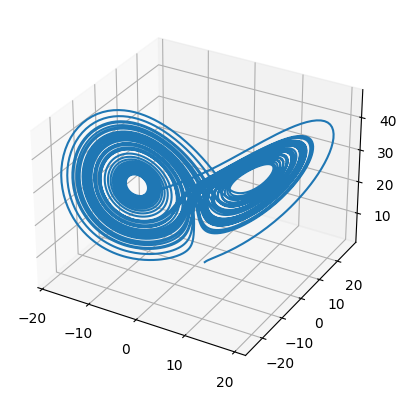

In [ ]:
sigma = 10.0
beta = 8./3
rho =28
r = [1.5,1.5,1.5]
t = np.linspace(0, 50, 10001)
params = (sigma,beta,rho)
graficar_atractor(fun_atractor,r,t,params)

- $\sigma = 10.0$, $\beta = 8./3$ ,$\rho = 25$  con condiciones iniciales,  $x_0,y_0,z_0 = [1.5,1,5,1.5]$





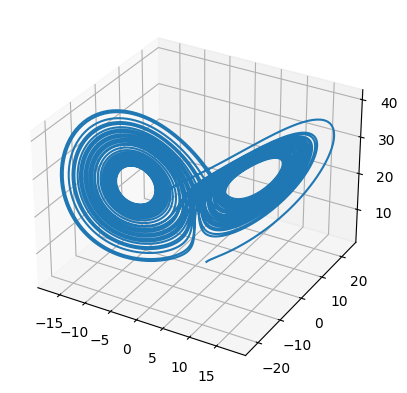

In [ ]:
sigma = 10.0
beta = 8./3
rho =25
r = [1.5,1.5,1.5]
t = np.linspace(0, 50, 10001)
params = (sigma,beta,rho)
graficar_atractor(fun_atractor,r,t,params)

- $\sigma = 10.0$, $\beta = 8./3$ ,$\rho = 25$  con condiciones iniciales,  $x_0,y_0,z_0 = [1,1,1]$



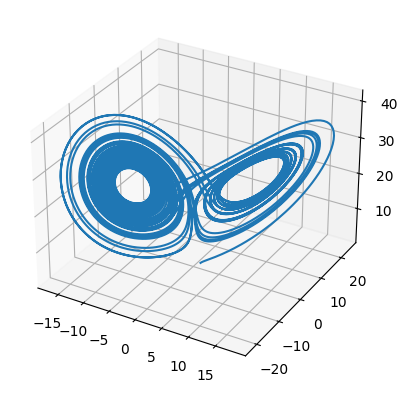

In [ ]:
sigma = 10.0
beta = 8./3
rho =25
r = [1,1,1]
t = np.linspace(0, 50, 10001)
params = (sigma,beta,rho)
graficar_atractor(fun_atractor,r,t,params)

- $\sigma = 10.0$, $\beta = 8./3$ ,$\rho = 25$  con condiciones iniciales,  $x_0,y_0,z_0 = [1001,1.001,1.001]$





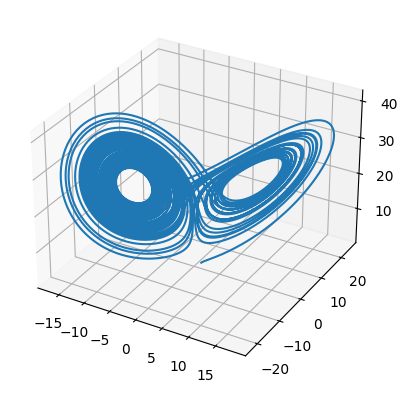

In [ ]:
sigma = 10.0
beta = 8./3
rho =25
r = [1.001,1.001,1.001]
t = np.linspace(0, 50, 10001)
params = (sigma,beta,rho)
graficar_atractor(fun_atractor,r,t,params)

5. ¿Cómo puede estar seguro de que la solución es la esperada?